# Happymonk Assignment

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
# load the dataset
datae = read_csv(url, header=None)
# summarize shape
datae.shape
datae.head()

(1372, 5)

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


                 0            1            2            3            4
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1048da6ee0>,
      dtype=object)

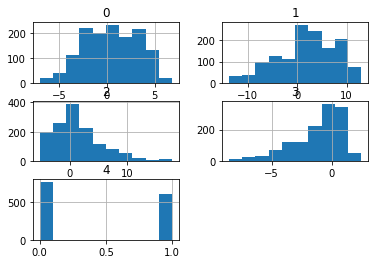

In [3]:
from matplotlib import pyplot
# show summary statistics
print(datae.describe())
# plot histograms
datae.hist()
pyplot.show()

In [4]:
datae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
for col in datae.columns:
    print(col)
    print('-------------------------')
    print(datae[col].value_counts()/np.float(len(datae)))
    print()

0
-------------------------
 0.5706    0.003644
 0.5195    0.002915
 0.3292    0.002915
 0.3798    0.002915
-2.6479    0.002187
             ...   
 0.1848    0.000729
 4.5707    0.000729
 2.9742    0.000729
 1.1472    0.000729
-2.5419    0.000729
Name: 0, Length: 1338, dtype: float64

1
-------------------------
-4.45520    0.004373
-3.26330    0.003644
 0.70980    0.002915
-3.79710    0.002915
-0.02480    0.002915
              ...   
 8.81100    0.000729
 6.40230    0.000729
 7.27970    0.000729
 2.10860    0.000729
-0.65804    0.000729
Name: 1, Length: 1256, dtype: float64

2
-------------------------
 1.2421    0.003644
 4.5718    0.003644
 3.0895    0.003644
 0.7572    0.002915
-3.7044    0.002187
             ...   
-2.0439    0.000729
 1.0588    0.000729
-0.7843    0.000729
-2.9024    0.000729
 2.6842    0.000729
Name: 2, Length: 1270, dtype: float64

3
-------------------------
-0.29570    0.003644
-0.98880    0.003644
-0.44440    0.002915
 0.36119    0.002915
-0.23751    0.00

<ipython-input-5-2bbfb22180f2>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(datae[col].value_counts()/np.float(len(datae)))


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

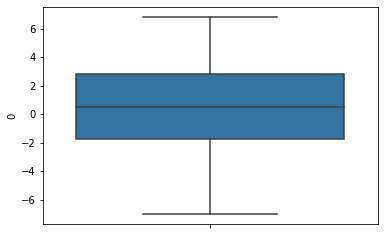

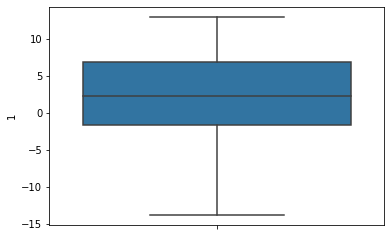

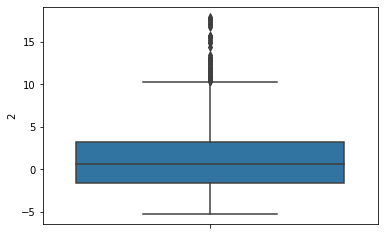

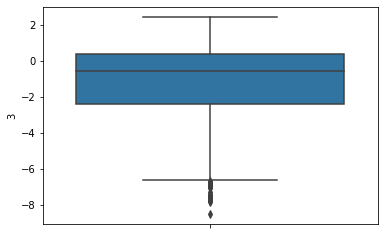

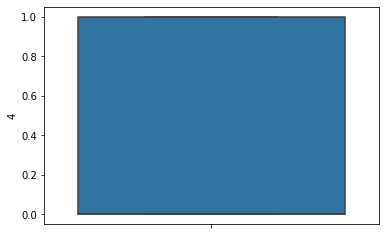

In [6]:
df1 = datae.select_dtypes([np.int64, np.float64])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.boxplot(y = col, data = df1)

In [7]:
# split into input and output columns
X, y = datae.values[:, :-1], datae.values[:, -1]

In [8]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
# determine the number of input features
n_features = X.shape[1]

# Implementing Activation function for 15 epochs

In [10]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=2, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict(X_test) > 0.5
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Epoch 1/15
35/35 - 1s - loss: 4.2379 - accuracy: 0.2407 - val_loss: 3.9307 - val_accuracy: 0.2182 - 1s/epoch - 38ms/step
Epoch 2/15
35/35 - 0s - loss: 3.3850 - accuracy: 0.2352 - val_loss: 3.1980 - val_accuracy: 0.2327 - 167ms/epoch - 5ms/step
Epoch 3/15
35/35 - 0s - loss: 2.7170 - accuracy: 0.2944 - val_loss: 2.6749 - val_accuracy: 0.3527 - 225ms/epoch - 6ms/step
Epoch 4/15
35/35 - 0s - loss: 2.2718 - accuracy: 0.4102 - val_loss: 2.3173 - val_accuracy: 0.4400 - 168ms/epoch - 5ms/step
Epoch 5/15
35/35 - 0s - loss: 1.9517 - accuracy: 0.4640 - val_loss: 2.0265 - val_accuracy: 0.4727 - 249ms/epoch - 7ms/step
Epoch 6/15
35/35 - 0s - loss: 1.6878 - accuracy: 0.5114 - val_loss: 1.7700 - val_accuracy: 0.5091 - 185ms/epoch - 5ms/step
Epoch 7/15
35/35 - 0s - loss: 1.4695 - accuracy: 0.5542 - val_loss: 1.5555 - val_accuracy: 0.5564 - 163ms/epoch - 5ms/step
Epoch 8/15
35/35 - 0s - loss: 1.2881 - accuracy: 0.5916 - val_loss: 1.3728 - val_accuracy: 0.5855 - 352ms/epoch - 10ms/step
Epoch 9/15
35/35 

In [11]:
from sklearn.metrics import classification_report
classification_report(y_test, yhat, labels=[0,1])

'              precision    recall  f1-score   support\n\n           0       0.80      0.77      0.79       152\n           1       0.73      0.76      0.75       123\n\n    accuracy                           0.77       275\n   macro avg       0.77      0.77      0.77       275\nweighted avg       0.77      0.77      0.77       275\n'

# Train vs test Accuracy

In [12]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.789, Test: 0.767


Text(0.5, 1.0, 'Loss Curve')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

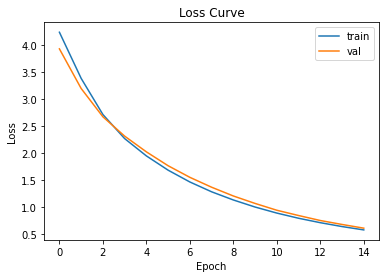

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

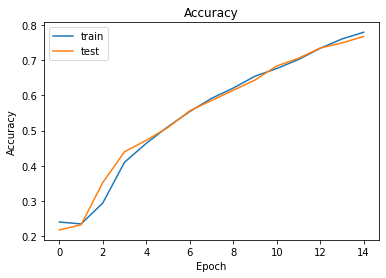

In [13]:
# plot learning curves
pyplot.title('Loss Curve')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

pyplot.title('Accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=2)>0.5
# predict crisp classes for test set
yhat_classes = model.predict(X_test, verbose=0)>0.5
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

9/9 - 0s - 44ms/epoch - 5ms/step
Accuracy: 0.767273
Precision: 0.728682
Recall: 0.764228
F1 score: 0.746032
Cohens kappa: 0.531491
ROC AUC: 0.766982
[[117  35]
 [ 29  94]]


# Implementing activation function for 25 epochs

In [15]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=2, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict(X_test) > 0.5
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Epoch 1/25
35/35 - 2s - loss: 2.7162 - accuracy: 0.2379 - val_loss: 2.3918 - val_accuracy: 0.2618 - 2s/epoch - 48ms/step
Epoch 2/25
35/35 - 0s - loss: 2.1793 - accuracy: 0.2826 - val_loss: 1.8557 - val_accuracy: 0.3309 - 139ms/epoch - 4ms/step
Epoch 3/25
35/35 - 0s - loss: 1.7147 - accuracy: 0.3428 - val_loss: 1.4283 - val_accuracy: 0.3855 - 150ms/epoch - 4ms/step
Epoch 4/25
35/35 - 0s - loss: 1.3751 - accuracy: 0.4193 - val_loss: 1.1422 - val_accuracy: 0.4945 - 231ms/epoch - 7ms/step
Epoch 5/25
35/35 - 0s - loss: 1.1319 - accuracy: 0.5360 - val_loss: 0.9310 - val_accuracy: 0.5818 - 181ms/epoch - 5ms/step
Epoch 6/25
35/35 - 0s - loss: 0.9358 - accuracy: 0.6235 - val_loss: 0.7542 - val_accuracy: 0.6764 - 291ms/epoch - 8ms/step
Epoch 7/25
35/35 - 0s - loss: 0.7703 - accuracy: 0.7037 - val_loss: 0.6150 - val_accuracy: 0.7709 - 235ms/epoch - 7ms/step
Epoch 8/25
35/35 - 0s - loss: 0.6378 - accuracy: 0.7885 - val_loss: 0.5032 - val_accuracy: 0.8327 - 165ms/epoch - 5ms/step
Epoch 9/25
35/35 -

In [16]:
from sklearn.metrics import classification_report
classification_report(y_test, yhat, labels=[0,1])

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98       152\n           1       0.98      0.98      0.98       123\n\n    accuracy                           0.98       275\n   macro avg       0.98      0.98      0.98       275\nweighted avg       0.98      0.98      0.98       275\n'

In [17]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.997, Test: 0.982


Text(0.5, 1.0, 'Loss Curve')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

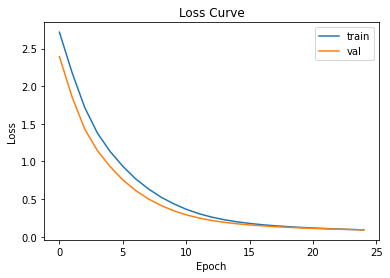

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

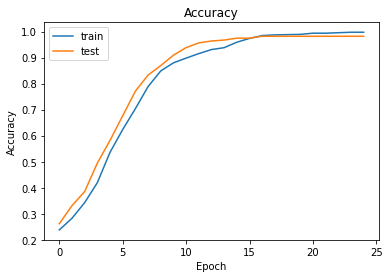

In [18]:
# plot learning curves
pyplot.title('Loss Curve')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

pyplot.title('Accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Eval metrics

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=2)>0.5
# predict crisp classes for test set
yhat_classes = model.predict(X_test, verbose=0)>0.5
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

9/9 - 0s - 40ms/epoch - 4ms/step
Accuracy: 0.981818
Precision: 0.975806
Recall: 0.983740
F1 score: 0.979757
Cohens kappa: 0.963256
ROC AUC: 0.982001
[[149   3]
 [  2 121]]
